# Niklas Tecklenburg (88481171)

## Research question/interests
(To be finalized/detailed)
I am planning to examine the dependance between the team and driver and how the importance may have switched over the last 70 seasons.

In [3]:
'''
Comments to keep in mind
- Include Accidents, Collisions
- DQ
- Include Engine Failures

- Are Teams repetetive good on certain tracks
- Examine Teams based on the reliability of there cars
'''

'\nComments to keep in mind\n- Include Accidents, Collisions\n- DQ\n- Include Engine Failures\n\n- Are Teams repetetive good on certain tracks\n- Examine Teams based on the reliability of there cars\n'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
circuits = pd.read_csv('../data/raw/circuits.csv', na_values=['\\N'])
constructor_res = pd.read_csv('../data/raw/constructor_results.csv', na_values=['\\N'])
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv', na_values=['\\N'])
constructors = pd.read_csv('../data/raw/constructors.csv', na_values=['\\N'])
driver_stand = pd.read_csv('../data/raw/driver_standings.csv', na_values=['\\N'])
drivers = pd.read_csv('../data/raw/drivers.csv', na_values=['\\N'])
lap_times = pd.read_csv('../data/raw/lap_times.csv', na_values=['\\N'])
pit_stops = pd.read_csv('../data/raw/pit_stops.csv', na_values=['\\N'])
qualifying = pd.read_csv('../data/raw/qualifying.csv', na_values=['\\N'])
races = pd.read_csv('../data/raw/races.csv', na_values=['\\N'])
results = pd.read_csv('../data/raw/results.csv', na_values=['\\N'])
seasons = pd.read_csv('../data/raw/seasons.csv', na_values=['\\N'])
status = pd.read_csv('../data/raw/status.csv', na_values=['\\N'])

In [6]:
# Sort out, which teams to consider via results find dates of their activity or via constructor results
# plot timeline for each team where they are ranked in the constructors rating
# plot where drivers for team over time

# find discrepancies between best times and positions maybe cars that are only good for few rounds 
# are there drivers that are only good for very few rounds

# How did best times for each track evolved over time

# mention that 2009 and 2010 are missing

## Number of Drivers Winning a race per Season

In [7]:
race_years = races[['raceId', 'year']]
df_results = results.merge(race_years, on='raceId', how='left')
df_results_driver_count = df_results.groupby('year').nunique().reset_index()
df_results_driver_count = df_results_driver_count[['driverId','year']]
df_results_driver_count = df_results_driver_count.rename(columns={'driverId': '#ofDrivers'})
race_winners = df_results[df_results['positionOrder'] == 1]
race_winners = race_winners.groupby(['year']).nunique().reset_index()
race_winners = race_winners[['driverId','year']]
race_winners = race_winners.rename(columns={'driverId':'#ofWinners'})
race_winners = race_winners.merge(df_results_driver_count, on='year', how='left')
race_winners = race_winners[['year', '#ofWinners', '#ofDrivers']]
race_winners['avg_num_winners'] = race_winners['#ofWinners'] / race_winners['#ofDrivers']
race_winners

,year,#ofWinners,#ofDrivers,avg_num_winners
0,1950,3,81,0.037037
1,1951,6,84,0.071429
2,1952,3,105,0.028571
3,1953,5,108,0.046296
4,1954,4,97,0.041237
...,...,...,...,...
67,2017,5,25,0.200000
68,2018,5,20,0.250000
69,2019,5,20,0.250000
70,2020,5,23,0.217391


<AxesSubplot:xlabel='year', ylabel='#ofDrivers'>

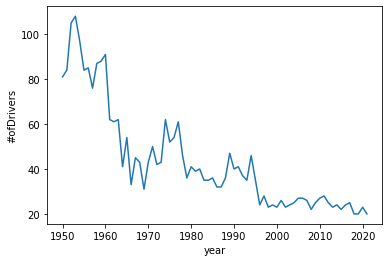

In [8]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers'])

<AxesSubplot:label='4946355a-40af-48b3-ac31-20381c96c30e', xlabel='year', ylabel='avg_num_winners'>

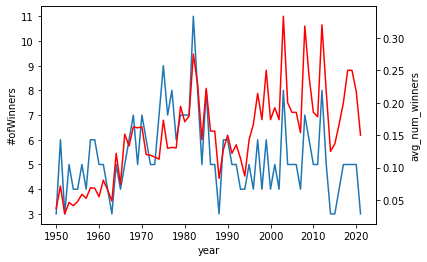

In [9]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofWinners'])
ax2 = plt.twinx()
sns.lineplot(x=race_winners['year'],y=race_winners['avg_num_winners'], ax=ax2, color="r")

## Number of Teams winning a race per season

## Pit Stop Times Exploration

In [274]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


In [2]:
# Average duration
df_pit_stops = pit_stops.merge(race_years, on='raceId', how='left')
df_pit_stops_duration = df_pit_stops.groupby(['year']).mean().reset_index()
df_pit_stops_duration['milliseconds'] = df_pit_stops_duration['milliseconds'] / 1000 
df_pit_stops_duration

NameError: name 'pit_stops' is not defined

<AxesSubplot:xlabel='year', ylabel='milliseconds'>

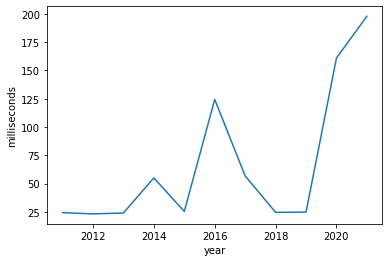

In [276]:
sns.lineplot(x=df_pit_stops_duration['year'], y=df_pit_stops_duration['milliseconds'])

# Why are there these 

In [277]:
# Aveage number of stops
df_pit_stops_number = df_pit_stops.groupby(['raceId','driverId']).max().reset_index()
df_pit_stops_number = df_pit_stops_number.groupby(['year']).mean().reset_index()
df_pit_stops_number['avg_stops_per_race'] = df_pit_stops_number['stop']
df_pit_stops_number

,year,raceId,driverId,stop,lap,milliseconds,avg_stops_per_race
0,2011,849.979021,225.608392,2.596737,39.477855,27492.722611,2.596737
1,2012,869.442953,329.574944,2.116331,34.908277,24396.982103,2.116331
2,2013,889.513716,457.650873,2.371571,36.301746,26190.623441,2.371571
3,2014,908.917989,458.838624,2.161376,34.505291,90976.293651,2.161376
4,2015,935.703170,499.657061,2.135447,35.386167,27515.438040,2.135447
5,2016,958.048724,543.958237,2.294664,31.821346,193524.948956,2.294664
6,2017,978.605042,585.392157,1.943978,29.680672,88961.081232,1.943978
7,2018,999.057592,627.853403,1.403141,29.272251,25313.510471,1.403141
8,2019,1019.960880,631.921760,1.591687,30.449878,25811.205379,1.591687
9,2020,1039.102236,678.246006,1.897764,33.878594,235613.910543,1.897764


<AxesSubplot:xlabel='year', ylabel='avg_stops_per_race'>

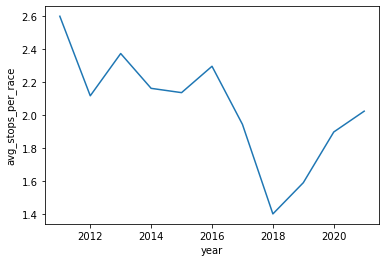

In [278]:
sns.lineplot(x=df_pit_stops_number['year'], y=df_pit_stops_number['avg_stops_per_race'])

## Number of Collisions (Driver could not finish race) per Year

In [279]:
df_results = df_results.merge(status, on="statusId", how='left')

In [280]:
df_results_col = df_results[(df_results['status']=='Collision') | (df_results['status']=='Collision damage')]
df_results_col = df_results_col.groupby(['year']).count().reset_index()

<AxesSubplot:xlabel='year', ylabel='status'>

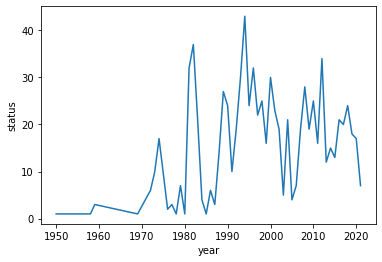

In [281]:
sns.lineplot(x=df_results_col['year'], y=df_results_col['status'])

## Average Number of Lappings in a Race per Season

In [302]:
df_results_lap = df_results[df_results['status'].str.startswith('+')]
df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)
df_lapings_seas = df_results_lap.groupby('raceId').sum().reset_index()[['raceId', 'Laps behind']].rename({'Laps behind':'Avg Laps behind'})
df_results_lap = df_results_lap[['year', 'raceId']].merge(df_lapings_seas, on='raceId', how='left')
df_results_lap = df_results_lap.drop_duplicates()
df_results_lap = df_results_lap.groupby('year').mean().reset_index()

<ipython-input-302-3d2a2697d167>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)


<AxesSubplot:xlabel='year', ylabel='#ofDrivers'>

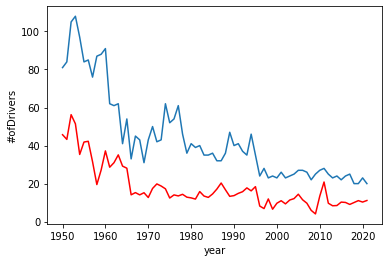

In [306]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers'])
sns.lineplot(x=df_results_lap['year'],y=df_results_lap['Laps behind'], color="r")

## How did the max speed evolved

In [316]:
df_results_speed = df_results.groupby('year').mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='fastestLapSpeed'>

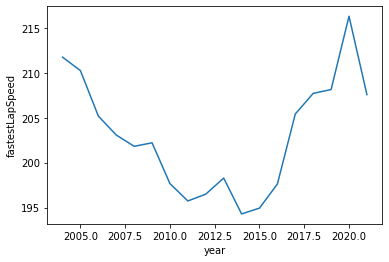

In [317]:
sns.lineplot(x=df_results_speed['year'], y=df_results_speed['fastestLapSpeed'])